# Investigating the effectiveness and efficiency of the Bisection, Regula-Falsi and Newton-Raphson root finding algorithms

## Bisection
The bisection algorithm is the simplest but was found to be the most reliable; almost always guaranteed to converge to a correct root of a function (f) if f is continuous on the interval (a, b) and f(a) and f(b) have opposite signs. It does not encounter 'divide by zero' errors and will not loop indefinitely.

However, if the range is large enough, it is possible to converge to a value that is not a root [(e.g. [$j(x)=x^3+47x^2 -148x +90 $](#Bisection-method-evaluated-with-different-parameters),bounds=(0,300) returns a false value of 300 , as it skips over the root when halving the range. Similarly, if there are two roots in interval, it will converge to either one, (e.g. [$l(x)=cos(x)$](#Bisection-method-evaluated-with-different-parameters) with interval (-2,2), it converges to the negative root. 

The absolute error is [halved](#Bisection-method-test-of-convergence) at each step so the method converges linearly, which can be comparatively slow, but the number of iterations taken to converge is found to be around 27 if the range chosen is small enough (~1).

## Regula-Falsi
    
Unlike the bisection algorithm, the range in Regula-Falsi (R-F) is not guaranteed to tend to zero and the number of iterations may be large.  This is because a and b are such that f(a) and f(b) have opposite signs, and at each step, one of the endpoints will get closer to a root. If f is of constant sign in the interval, then one endpoint will remain constant for all succeeding iterations while the converging endpoint will change.  So to test whether a root is found, the value of f at both endpoints was [checked](#Regula-Falsi:-test-of-convergence). This is also shown when using the function [$g(x) = x^8-2x-1$](#Graphs-of-functions-used-to-test-algorithms) with the initial bounds (1,2). The left end, 1, is never replaced and hence the range decreases very slowly.

Furthermore, it is possible for R-F to converge to a point where the limit of the function is zero, even though at that point the function may have another value or may be undefined. An example of this phenomenon occurs when using [$z(x) = |x| – x^2$](#Regula-Falsi-method-evaluated-with-different-parameters) (true roots at -1,0,1), with the initial bounds (-0.5, 3.0). When the curve is very steep, and there is no root within the range, there is also a convergence to a false root; after a great number of iterations, as in $n(x)=(sec x)^2-1$ in the interval (0.5,1.5).

## Newton-Raphson

The smooth and continuous curve [$f(x)=x^2 -2 $](#Newton-Raphson-Evaluations) was evaluated using different initial guesses, showing that the Newton-Raphson (N-R) algorithm always converges to a root for 'simple' curves. It was also found that the sign of the guess could determine the sign of the root found and that N-R is the fastest method, when it does not encounter problems; only needing 5-7 iterations when the guess is of the same magnitude as the root. Even when the guess was much further away from the root, the rate of convergence is relatively fast. Such as when the difference was of magnitude 5 and the number of iterations increased to 21. 

Although the N-R method converges fastest, it is at a disadvantage when encountering division by, or a number near zero. When the derivative is zero, such as at [$f'(0)$](#Zero-Division-Error) the method terminates due to 'division by zero'. Division by a near-zero number will give a large magnitude for the next value; the smaller the initial number the larger the value it will converge to. This was shown when evaluating [$l(x)=cos(x)$](#Newton-Raphson-Evaluations) at increasingly smaller values; as the magnitude of the guess decreased, the magnitude at which it converged increased.

For a curve, such as tan(x), that has points which the function and its derivative are undefined, the guess chosen must be very close to the root. A difference of ~0.5 causes the algorithm to diverge to infinity and cause an [overflow runtime error](#Overflow).

Another problem occurs if at the root there is an inflection point, where the sign of the gradient remains the same on either side, but the sign of the function changes. This causes N-R to switch between a positive and a negative point indefinitely if the initial value is relatively small. If the initial value is very large, N-R overshoots and diverges from the root. This is shown when evaluating the function [$mu(x) = tan(x)-x$](#Running-indefinitely), where the algorithm runs indefinitely for any starting value.

## Improvements

In order to avoid loss of precision when the difference of two numbers is very small, such as for the function $m(x)=tan(x)-x$
the Taylor expansion can be utilised. Similarly, for N-R, the Central Difference method (CD) with optimal step size 1e-3 (as found in Lab5) can be used to find derivatives.

The R-F method can be improved by checking if one of the points is unchanged twice successively, and if so, changing the point to the average of the two points, as is done in the bisection method.

The three methods can be combined in order to converge to a correct root quickly.
Begining with N-R, and checking if it converges; then switching to R-F if not. If R-F is not converging as well as bisection would, switch to bisection, which will always converge at a practical rate. When the change in f(x) and x has become very small, and f'(x) is not near zero, switch again to Newton's method as it will most likely converge.

## Importing relevant functions from libraries

In [1]:
%matplotlib inline
from pylab import plot,figure,grid, linspace, figure, cos, sin, tan, exp, logspace, loglog, xlabel, ylabel, title, legend
import numpy as np
import matplotlib.pyplot as plt
from scipy import diff

## Bisection algorithms

In [2]:
def bisection_step(f, bounds):
    """Performs one step of the bisection algorithm to locate a root of f, 
    and returns a smaller range in which the root is found."""
    lower, upper = bounds      
    middle = (lower + upper)/2
    
    if f(lower)*f(middle)<0:
        return(lower,middle)
    else:
        return (middle,upper)
    
def bisection_iteration(function,bounds):
    "Performs several steps of the bisection method until a specified accuracy is reached"
    counter=0 #step counter
    lower,upper=bounds
    while upper-lower >1e-8:
        lower,upper=bisection_step(function,(lower,upper))
        counter+=1
    bounds = str(bounds)[1:-1].split(',')
    print("{:^15s} {:>5s} {:>5s}  {:10d} {:17.5e}".format(str(function)[10:12], bounds[0],bounds[1], counter, lower))

## Regula Falsi algorithms

In [3]:
def regula_falsi_step(function, bounds):
    """Performs one step of the regula falsi algorithm to locate a root of f, 
    and returns a smaller range in which the root is found."""
    
    lower, upper = bounds

    middle=(lower*function(upper)-upper*function(lower))/(function(upper)-function(lower))
    
    if function(lower)*function(middle)<0:
        return (lower, middle)
    else:
        return (middle,upper)
    
def iterate_regula_falsi(function,bounds):
    """Performs several steps of the regula falsi algorithm until a specified accuracy is reached."""
    counter=0 # step counter
    lower, upper = bounds 
    while abs(function(lower))>1e-8 and abs(function(upper))>1e-8:
        lower, upper = regula_falsi_step(function,(lower,upper))
        counter+=1
    bounds = str(bounds)[1:-1].split(',')
    print("{:^15s} {:>5s} {:>5s}  {:10d} {:17.5e}".format(str(function)[10:12], bounds[0],bounds[1], counter, lower))

## Newton-Raphson algorithms

In [4]:
def newton_step(f, fp, x0):
    """Perform one step of the Newton-Raphson algorithm."""
    # x0 = initial guess, f = function, fp = derivative of function
    return x0 - f(x0)/fp(x0)

def newton_iteration(f,fp,x0):
    """"Perfoms several steps of the Newton-Raphson algorith until a specific accuracy is reached"""
    count=1
    x=1
    xn=newton_step(f,fp,x0)
    while abs(x-xn) > 1e-8:
        count +=1
        a=xn
        xn=newton_step(f,fp,xn)
        x=a
    print("{:^10s} {:15.5e}  {:13d} {:17.5e}".format(str(f)[10:12], x0, count, xn))

## Functions used to test algorithms

In [5]:
#function e.g. g, and its derivative e.g. gp
def f(x):
    return x**2 - 2
def fp(x):
    return 2*x

def g(x):                              
    return x**8-2*x -1
def gp(x):
    return 8*x**7-2

def h(x):
    return (x-1)/(x-2)
def j(x):
    return x**3+47*x**2 -148*x +90
def k(x):
    return x**4 -8*x**3 +22*x**2 -24*x +9

def l(x):
    return cos(x)
def lp(x):
    return -sin(x)

def m(x):
    return tan(x)-x
def n(x): # mp derivative of m(x)
    return (1/cos(x))**2 -1

def mu(x):
    if x>=0:
        return np.sqrt(x)
    else:
        return -np.sqrt(-x)
mu = np.vectorize(mu)    # vectorise function and its derivative in order for arrays to be evaluated

def mup(x):
    if x>=0:
        return 1/2*np.sqrt(x)
    else:
        return 1/2*np.sqrt(-x)
    
mup = np.vectorize(mup)

def z(x):
    return abs(x) - x**2 

## Graphs of functions used to test algorithms

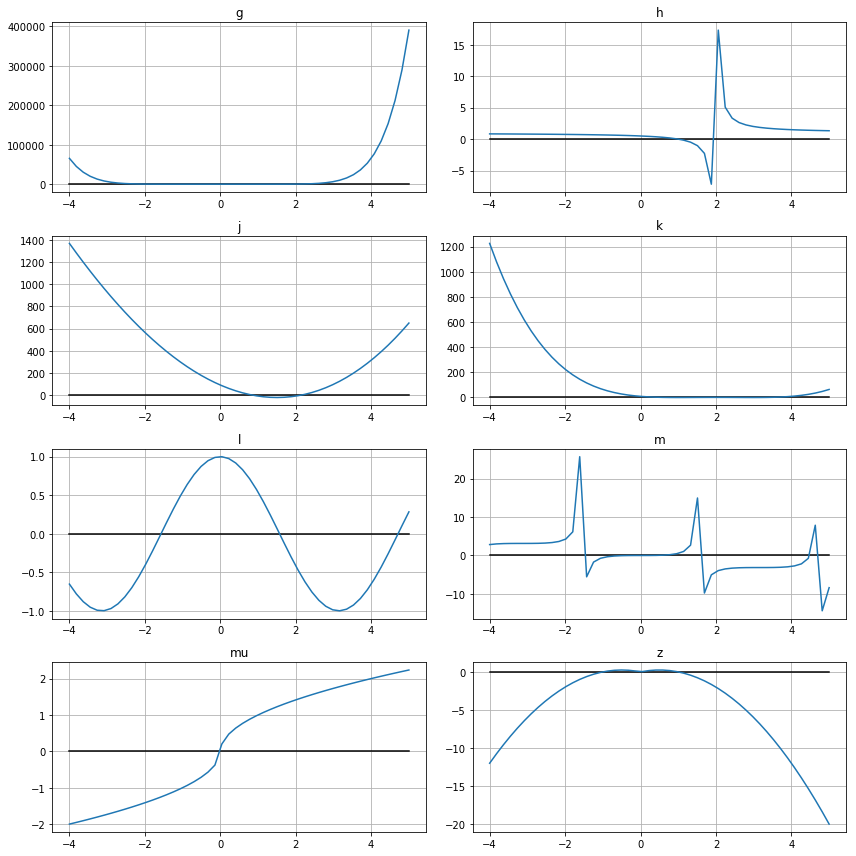

In [6]:
# plotted graphs

x = np.linspace(-4.0, 5.0)

y=[g(x),h(x),j(x),k(x),l(x),m(x),mu(x), z(x)]

title="g h j k l m mu z".split(" ")

fig = plt.figure(figsize=(12,12))


for i in range(1,9):
    plt.subplot(4,2,i)
    plt.plot(x,0*x,'k-')
    plt.plot(x,y[i-1])
    plt.title(title[i-1])
    grid()
plt.tight_layout()

### Bisection method: test of convergence

In [7]:
print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference"))

lower, upper = 0, 5 # Starting range
for i in range(20):
    lower, upper = bisection_step(f, (lower, upper)) 
    print("{:15.12f}  {:15.12f}  {:15.12f}".format(lower, upper, upper-lower))

     lower            upper         difference   
 0.000000000000   2.500000000000   2.500000000000
 1.250000000000   2.500000000000   1.250000000000
 1.250000000000   1.875000000000   0.625000000000
 1.250000000000   1.562500000000   0.312500000000
 1.406250000000   1.562500000000   0.156250000000
 1.406250000000   1.484375000000   0.078125000000
 1.406250000000   1.445312500000   0.039062500000
 1.406250000000   1.425781250000   0.019531250000
 1.406250000000   1.416015625000   0.009765625000
 1.411132812500   1.416015625000   0.004882812500
 1.413574218750   1.416015625000   0.002441406250
 1.413574218750   1.414794921875   0.001220703125
 1.414184570312   1.414794921875   0.000610351562
 1.414184570312   1.414489746094   0.000305175781
 1.414184570312   1.414337158203   0.000152587891
 1.414184570312   1.414260864258   0.000076293945
 1.414184570312   1.414222717285   0.000038146973
 1.414203643799   1.414222717285   0.000019073486
 1.414213180542   1.414222717285   0.000009536743


### Bisection method evaluated with different parameters

In [17]:
#Run bisection and regula falsi algorithms for functions g-n
print("{:^12} {:^15}    {:^12} {:^15} ".format("Function", "Bounds" , "Count", "Root")+"\n")

#g
bisection_iteration(g,(1,2))
bisection_iteration(g,(1.1,1.2))
bisection_iteration(g,(0,200))
bisection_iteration(g,(-20,0))
bisection_iteration(g,(-200,0))

bisection_iteration(h,(0.5,1.5))
bisection_iteration(h,(1,2))
#bisection_iteration(h,(0,4)) # Division by zero error
 
#j
bisection_iteration(j,(0,300))
bisection_iteration(j,(0,1))
bisection_iteration(j,(-400,4))

#k
bisection_iteration(k,(-1,1.5))
bisection_iteration(k,(-4,4))

#l
bisection_iteration(l,(-2,2))
bisection_iteration(l,(-20,20))

#n
bisection_iteration(n,(0.5,1.5))
bisection_iteration(n,(-2,-1.4))
bisection_iteration(n,(0.5,1.5))

  Function       Bounds            Count          Root       

      g             1     2          27       1.16200e+00
      g           1.1   1.2          24       1.16200e+00
      g             0   200          35       1.16200e+00
      g           -20     0          31      -4.98105e-01
      g          -200     0          35      -4.98105e-01
      h           0.5   1.5          27       1.50000e+00
      h             1     2          27       2.00000e+00
      j             0   300          35       3.00000e+02
      j             0     1          27       8.31623e-01
      j          -400     4          36      -4.99962e+01
      k            -1   1.5          28       1.50000e+00
      k            -4     4          30       4.00000e+00
      l            -2     2          29      -1.57080e+00
      l           -20    20          32       7.85398e+00
      n           0.5   1.5          27       1.50000e+00
      n            -2  -1.4          26      -1.40000e+00
      n  

[go to top of page](#Investigating-the-effectiveness-and-efficiency-of-the-Bisection,-Regula-Falsi-and-Newton-Raphson-root-finding-algorithms)

## Regula-Falsi: test of convergance

In [9]:
print("{:^15}  {:^15}  {:^15}".format("lower", "upper", "difference"))
lower, upper = 0, 5 # Same starting range as for Bisection
while abs(f(lower))>1e-8 and abs(f(upper))>1e-8:
        lower, upper = regula_falsi_step(f,(lower,upper))
        print("{:15.12f}  {:15.12f}  {:15.12f}".format(lower, upper, upper-lower))

     lower            upper         difference   
 0.400000000000   5.000000000000   4.600000000000
 0.740740740741   5.000000000000   4.259259259259
 0.993548387097   5.000000000000   4.006451612903
 1.162540365985   5.000000000000   3.837459634015
 1.267772925764   5.000000000000   3.732227074236
 1.330435024942   5.000000000000   3.669564975058
 1.366758380841   5.000000000000   3.633241619159
 1.387486594558   5.000000000000   3.612513405442
 1.399209664159   5.000000000000   3.600790335841
 1.405806153091   5.000000000000   3.594193846909
 1.409507335950   5.000000000000   3.590492664050
 1.411580673136   5.000000000000   3.588419326864
 1.412741073918   5.000000000000   3.587258926082
 1.413390196971   5.000000000000   3.586609803029
 1.413753211077   5.000000000000   3.586246788923
 1.413956190226   5.000000000000   3.586043809774
 1.414069675897   5.000000000000   3.585930324103
 1.414133122621   5.000000000000   3.585866877379
 1.414168592965   5.000000000000   3.585831407035


## Regula-Falsi method evaluated with different parameters

In [10]:
print("{:^12} {:^15}    {:^12} {:^15} ".format("Function", "Bounds" , "Count", "Root")+"\n")
#g
iterate_regula_falsi(g,(1,1.2))
iterate_regula_falsi(g,(1,2.5))

#h
iterate_regula_falsi(h,(0.9,1.1))
iterate_regula_falsi(h,(0,1.5))

#i
iterate_regula_falsi(z,(-0.5, 3.0))

#j
iterate_regula_falsi(j,(0.5,1))
iterate_regula_falsi(j,(2,2.5))
iterate_regula_falsi(j,(0.5,2.5))
iterate_regula_falsi(j,(-100,200))

#k
iterate_regula_falsi(k,(0.5,1.5))
iterate_regula_falsi(k,(0.5,3.2))
iterate_regula_falsi(k,(2.8,3.2))

#n
iterate_regula_falsi(n,(0.5,1.5))

#z
iterate_regula_falsi(z,((-0.5, 3.0)))


  Function       Bounds            Count          Root       

      g             1   1.2          10       1.16200e+00
      g             1   2.5        1084       1.16200e+00
      h           0.9   1.1           7       1.00000e+00
      h             0   1.5          27       1.00000e+00
      z          -0.5   3.0          28      -5.39813e-09
      j           0.5     1          13       5.00000e-01
      j             2   2.5          14       2.16461e+00
      j           0.5   2.5          16       2.16461e+00
      j          -100   200         415      -4.99962e+01
      k           0.5   1.5        5626       1.00005e+00
      k           0.5   3.2        4841       3.00005e+00
      k           2.8   3.2        4842       3.00005e+00
      n           0.5   1.5     1326129       1.00000e-04
      z          -0.5   3.0          28      -5.39813e-09


### Regula-falsi fails to converge as the gradient at some points is zero

In [11]:
# iterate_regula_falsi(k,(2.5,40)) Runs indefinitely 

[go to top of page](#Investigating-the-effectiveness-and-efficiency-of-the-Bisection,-Regula-Falsi-and-Newton-Raphson-root-finding-algorithms)

# Newton-Raphson Evaluations

In [12]:
print("{:^12} {:^15}    {:^12} {:^15} ".format("Function", "Guess" , "Count", "Root")+"\n")

#f
newton_iteration(f,fp,7)
newton_iteration(f,fp,10**5)
newton_iteration(f,fp,-1)
#m
newton_iteration(m,n,4.5) 
newton_iteration(m,n,8)
#l
newton_iteration(l, lp, 1e-1)
newton_iteration(l, lp, 1e-2)
newton_iteration(l, lp, 2e-3)
newton_iteration(l, lp, 4e-10)
newton_iteration(l, lp, 4e-20)

  Function        Guess            Count          Root       

    f          7.00000e+00              7       1.41421e+00
    f          1.00000e+05             21       1.41421e+00
    f         -1.00000e+00              5      -1.41421e+00
    m          4.50000e+00              4       4.49341e+00
    m          8.00000e+00              7       1.09041e+01
    l          1.00000e-01              6       1.09956e+01
    l          1.00000e-02              6       9.89602e+01
    l          2.00000e-03              7       5.01084e+02
    l          4.00000e-10              4       2.50000e+09
    l          4.00000e-20              2       2.50000e+19


## Errors and warnings when using N-R

### Running indefinitely

In [34]:

a = 1e-10  # Starting value
for i in range(10):
    a = newton_step(mu, mup, a) 
    print("{:15.2f}".format(a))

          -2.00
           0.00
          -2.00
           0.00
          -2.00
           0.00
          -2.00
           0.00
          -2.00
           0.00


In [35]:
a = 1 # Starting value
for i in range(10):
    a = newton_step(mu, mup, a) 
    print("{:15.2f}".format(a))

          -1.00
           1.00
          -1.00
           1.00
          -1.00
           1.00
          -1.00
           1.00
          -1.00
           1.00


In [39]:
a = 1e5  # Starting value
for i in range(10):
    a = newton_step(mu, mup, a) 
    print("{:15.1f}".format(a))

        99998.0
        99996.0
        99994.0
        99992.0
        99990.0
        99988.0
        99986.0
        99984.0
        99982.0
        99980.0


### Zero Division Error

In [16]:
newton_iteration(f,fp,0) # algorithm produces division by zero error

ZeroDivisionError: division by zero

### Overflow 

In [31]:
newton_iteration(m,n,4) 
newton_iteration(m,n,7)

    m          4.00000e+00            549               nan
    m          7.00000e+00            521               nan


J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: overflow encountered in double_scalars
J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: RuntimeWarning: invalid value encountered in tan
J:\Physics\ComputerWorkshop\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: invalid value encountered in cos


[go to top of page](#Investigating-the-effectiveness-and-efficiency-of-the-Bisection,-Regula-Falsi-and-Newton-Raphson-root-finding-algorithms)